## Metropolis-Hastings Algorithm
##### **** The Implemented code is inspired from this repository: https://github.com/rodolformelo/Metropolis-Hastings-Algorithm/ and then modified with the aims of this project work.

The Metropolis-Hastings algorithm is an example of MCMC sampling methods. This algorithm generates a set of random variables $\left\{\theta^{(t)}\right\}$ continuously for $t=1, 2, \ldots$, provided it has a joint posterior distribution $\pi(\theta \mid \mathbf{x})$. To produce these samples, this algorithm requires us to determine the proposed density $p\left(\theta^{(t+1)}, \theta^{(t)}\right)$. This function is the probability density function of θ at time t+1, given its value at time t. Therefore, the performance of the Metropolis-Hastings algorithm is expressed as follows
 
$$
\theta^{(t+1)} \sim p\left(\theta^{(t+1)}, \theta^{(t)}\right)
$$


$$
\boldsymbol{\theta}^{(t)}= \begin{cases}\theta^{(t+1)} & \rho\left(\theta^{(t)}, \theta^{(t+1)}\right) \\ \theta^{(t)} & 1-\rho\left(\theta^{(t)}, \theta^{(t+1)}\right)\end{cases}
$$


$$
\rho\left(\theta^{(t)}, \theta^{(t+1)}\right)=\min \left\{1, \frac{f\left(\mathbf{x} \mid \theta^{(t+1)}\right) \pi\left(\theta^{(t+1)}\right)}{f\left(\mathbf{x} \mid \theta^{(t)}\right) \pi\left(\theta^{(t)}\right)} \frac{p\left(\theta^{(t)}, \theta^{(t+1)}\right)}{p\left(\theta^{(t+1)}, \theta^{(t)}\right)}\right\}
$$
## Task 1
+ ### Univariate case
#### $
\mathrm{y}=\beta_0+\beta_1 x+np.random.normal(loc=0, scale = \text{sigma}, size=(n,1))
$
#### $
\mathrm{y}=1+2.5 x+np.random.normal(loc=0, scale = \text{sigma}, size=(n,1))
$

#### $
\text { True Values of $\beta_0$, $\beta_1$, and size of the samples : }
$
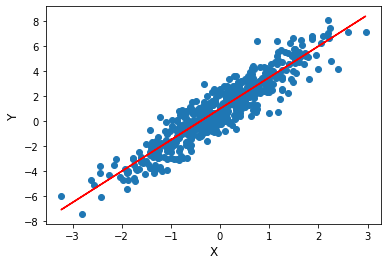

### $$\text{Real Valuse:}$$
## $$
\begin{array}{|c|c|}
\hline \beta_{0} & 1 \\
\hline \beta_{1} & 2.5 \\
\hline \sigma & 1 \\
\hline size & 500 \\
\hline
\end{array}
$$


### $$Estimation:$$
## $$
\begin{array}{|c|c|}
\hline \beta_{0} & 0.7336 \\
\hline \beta_{1} & 1.8493 \\
\hline \sigma & 3.893 \\
\hline
\end{array}
$$
### $$\text{Percentage absolute relative error (PARE):}$$
## $$
\begin{array}{|c|c|}
\hline \beta_{0} & 29.16 \text{%} \\
\hline \beta_{1} & 48.34 \text{%} \\
\hline
\end{array}
$$
+ ###  Effect of using different proposals:

$$
\begin{array}{|c|c|c|c|l|l|}
\hline \begin{array}{l}
\text { Proposal } \\
\text { Distribution } \\
\end{array} & \text { Normal } & \text { Beta } & \text { Uniform } & \begin{array}{l}
\text { Poisson with lambda = 0.5 } \\
\end{array} & \text { Gamma } \\
\hline \begin{array}{c}
\text { Acceptance Rate } \\
\text {}
\end{array} & \mathbf{0.5592} & 0.02026 & 1 & 0.01246 & 0.06458 \\
\hline \boldsymbol{y}_{\text {mean }} & \mathbf{0 . 8 6 2 9} & 0.8629 & 0.8629 & 0.8629 & 0.8629 \\
\hline \boldsymbol{\beta_0} & \mathbf{0.7336} & 0.8948 & 0.8822 & 0.9296 & {0 . 5783} \\
\hline \boldsymbol{\beta_1} & \mathbf{1.8493} & 0.8257 & 0.5 & 1.725 & {1.3567} \\
\hline
\end{array}
$$

+ ###  $\sigma$ Estimation:
$$
\begin{aligned}
\operatorname{Var}(Y) &=\operatorname{Var}(\beta_0+\beta_1 X+\epsilon) \\
&=\operatorname{Var}(\beta_1 X+\epsilon) \\
&=\operatorname{Var}(\beta_1 X)+\operatorname{Var}(\epsilon) \\
&=(\beta_1)^{2} \operatorname{Var}(X)+\operatorname{Var}(\epsilon) \\
\end{aligned}
$$



In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal, bernoulli
#from statsmodels.discrete.discrete_model import Probit
#from statsmodels.tsa.stattools import acf
#from statsmodels.graphics.tsaplots import plot_acf
np.random.seed(123)

In [196]:
np.random.seed(123)
n = 500 # number of observations
k = 2 # k = number of betas -1

X = np.ones((n,k+1))
X[:,1:] = np.random.normal(loc=0,scale=1,size=k*n).reshape(n,k)
beta_true = np.matrix( [1,2.5,-0.5]).T
sigma_true = 0.5
y = np.dot(X,beta_true) + np.random.normal(loc=0, scale = sigma_true, size=(n,1))

In [88]:
y.shape

(500, 1)

In [89]:
X

array([[ 1.        , -1.0856306 ,  0.99734545],
       [ 1.        ,  0.2829785 , -1.50629471],
       [ 1.        , -0.57860025,  1.65143654],
       ...,
       [ 1.        , -0.41964074,  0.63476313],
       [ 1.        ,  1.0699186 , -0.90932702],
       [ 1.        ,  0.47026375, -1.11143045]])

In [18]:
X0 = np.array(X[:,0].reshape(-1,1))
X1 = np.array(X[:,1].reshape(-1,1))
YY = np.array(eta)

In [197]:
# Define priors
beta0 = np.zeros(shape=(k+1,))
Sigma0 = 10000 * np.identity(k+1)
a0 = 0.0001
b0 = 0.0001

In [20]:
Sigma0

array([[10000.,     0.,     0.],
       [    0., 10000.,     0.],
       [    0.,     0., 10000.]])

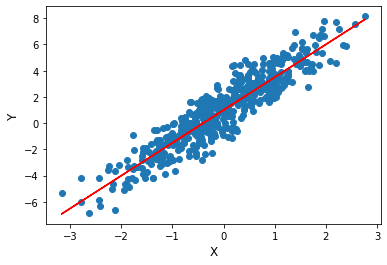

In [67]:
#plt.scatter(X0,Y)
#Y =  bernoulli.rvs(p = norm.cdf(eta))
YY.mean()
plt.scatter(X1,YY)
plt.plot(X1,X0+2.5*X1,color='red')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
#Y =  bernoulli.rvs(p = norm.cdf(eta))
YY.mean()
plt.show()

In [208]:
# MCMC parameters
burn_in = 1000

In [209]:

def Li(beta, x, y): # likelihood calculations
    q = 2*y - 1
    eta = np.dot(x,beta)
    eta_q = np.multiply(q.T,eta)
    p = norm.cdf(eta_q)
    likehood = np.prod(p)
    return likehood

def Li2(beta, x, y): # likelihood calculations
    q = 2*y - 1
    eta = np.dot(x,beta)
    eta_q = np.multiply(q.T,eta)
    p = norm.cdf(eta_q)
    likehood = np.prod(p)
    return likehood

def Pr(beta, lambda0=10): #prior
    mean = np.zeros(shape=(beta.shape[0],))
    cov = (1/lambda0) * np.identity(beta.shape[0])
    prior_distribution = multivariate_normal(mean=mean, cov=cov)
    return prior_distribution.pdf(beta)

def POST(beta, x, y, lambda0=10): #posterire
    return Pr(beta, lambda0)*Li(beta, x, y)

# p(beta | X, y sigma2)
def LOGPOST(beta, X, y, sigma2):
    log_likelihood = (-0.5 * (y.T - X @ beta) @ (y.T - X @ beta).T / sigma2).squeeze()
    log_prior_beta = (-0.5 * (beta - beta0).reshape(1, -1) @ np.linalg.inv(Sigma0) @ (beta - beta0).reshape(-1, 1)).squeeze()
    return log_likelihood + log_prior_beta

#Work in log form for numeric stability
def ACCPT(beta_new, beta_old, x, y, sigma2):
    PN = LOGPOST(beta_new, x, y, sigma2)
    PO = LOGPOST(beta_old, x, y, sigma2)
    logratio = PN - PO
    ratio = np.exp(logratio)
    return min(1, ratio)

def COV(beta,x):
    np.seterr(divide = 'ignore')
    n,p = x.shape
    eta = np.dot(x,beta)
    numerator = norm.pdf(eta)**2
    denominator = (norm.cdf(eta))*(1.0001-norm.cdf(eta))
    value = np.divide(numerator, denominator)
    W = value * np.identity(n)
    I = x.T @ W @ x
    invI = np.linalg.inv(I)
    return invI

def MH(y,X,lambda0 = 1000, interations=5000, start=0, tau=1):
    n,p = X.shape
    np.random.seed(0)
    beta_tried = np.zeros(shape=(p,interations))
    beta_out = np.zeros(shape=(p,interations))
    sigma2_out = np.zeros(shape=(1, interations))
    sigma2 = 0.3
    beta_old = np.random.multivariate_normal(mean=np.zeros(k+1), cov=np.identity((p))/lambda0)
    acpt = 0
    for i in range(interations):
        
        # Sample sigma2
        a = a0 + n / 2
        z = y.T - X @ beta_old
        b = b0 + 0.5 * z @ z.T
        precision = np.random.gamma(a, 1 / b)
        sigma2 = 1 / precision
        sigma2_out[:, i] = sigma2
        
        # Sample beta
        beta_new = np.random.multivariate_normal(mean=beta_old, cov=np.identity((p))/tau) 
        beta_tried[:,i] = beta_new.T
        u = np.random.rand()
        alpha = ACCPT(beta_new, beta_old, X, y, sigma2)
        if u < alpha:
            beta_old = beta_new
            acpt+=1   
        beta_out[:,i] = beta_old.T
        acpt_rate = acpt/interations
    return sigma2_out, beta_out, beta_tried, acpt_rate

In [227]:
interations = 2000
sigma2_chain, beta, beta_tried, acpt_rate = MH(y=y,X=X, interations=interations, tau=1000, lambda0=1000000, start=0) 
print(f"The acceptance rate: {np.round(acpt_rate*100,4)}% \n")
for n in range(beta.T[0].shape[0]):
    true = float(beta_true[n])
    m = np.around(np.mean(beta[n,burn_in:]),4)
    stdev = np.around(np.std(beta[n,burn_in:]),4)
    print(f"Beta({n}) mean prediction: {m}, true_beta: {true} \n")
sigma2_pred = sigma2_chain[:, burn_in:].mean()
sigma2_true = sigma_true ** 2
print(f"sigma2 prediction: {sigma2_pred}, true sigma2: {sigma2_true}")

The acceptance rate: 29.6% 

Beta(0) mean prediction: 1.025, true_beta: 1.0 

Beta(1) mean prediction: 2.5002, true_beta: 2.5 

Beta(2) mean prediction: -0.5129, true_beta: -0.5 

sigma2 prediction: 0.21058462864090474, true sigma2: 0.25


In [228]:
#beta0 = np.around(np.mean(beta[0,:]),4)
#beta1 = np.around(np.mean(beta[1,:]),4)

In [229]:
#np.var(eta)-(beta0**2)*np.var(X0)-(beta1**2)*np.var(X1)


 BETA(0) 



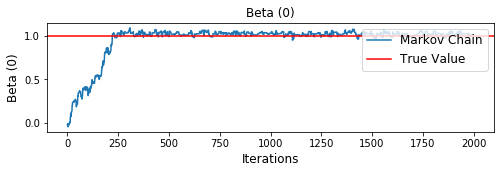


 BETA(1) 



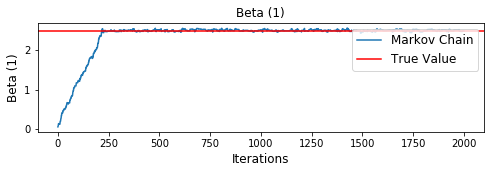


 BETA(2) 



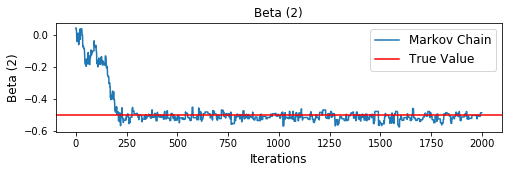

In [230]:
for n in range(beta.shape[0]):
    print(f"\n BETA({n}) \n")
    plt.figure(figsize=(8,2))
    plt.title(f'Beta ({n})')
    plt.plot(beta[n,:].T) 
    plt.axhline(beta_true[n], color='r', linestyle='-')
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel(f'Beta ({n})', fontsize=12)
    plt.legend(['Markov Chain','True Value'], fontsize=12, loc=1)
    #plt.ylim((0,1.25))
    plt.show()


 BETA(0) 



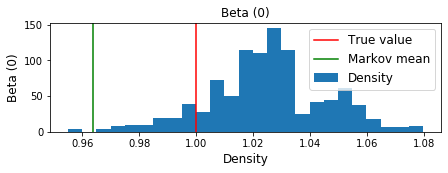


 BETA(1) 



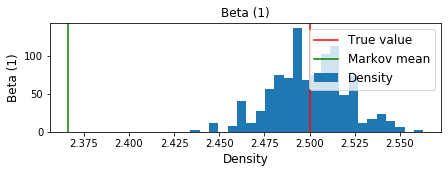


 BETA(2) 



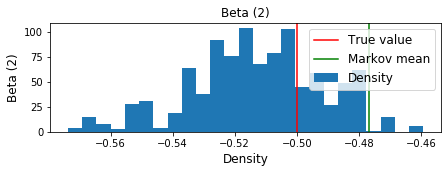

In [231]:
for n in range(beta.shape[0]):
    print(f"\n BETA({n}) \n")
    plt.figure(figsize=(7,2))
    plt.title(f'Beta ({n})')
    plt.hist(beta[n,burn_in:], bins=25)
    plt.axvline(beta_true[n], color='r', linestyle='-')
    plt.axvline(np.mean(beta[n,:]), color='green', linestyle='-')
    #plt.axvline(MLE[n], color='blue', linestyle='-')
    plt.xlabel('Density', fontsize=12)
    plt.ylabel(f'Beta ({n})', fontsize=12)
    plt.legend(['True value', 'Markov mean','Density'], fontsize=12, loc=1)
    plt.show()

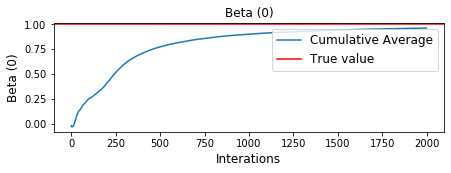

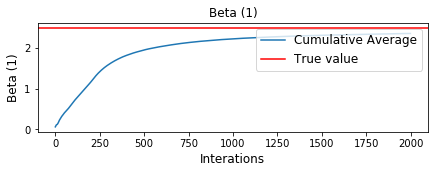

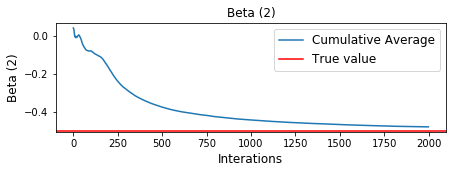

In [232]:
for n in range(beta.shape[0]):
    beta_avg_cum = np.zeros(shape=(interations,))
    for t in range (interations):
        beta_avg_cum[t] = np.sum(beta[n,:t+1])/(t+1)
    plt.figure(figsize=(7,2))
    plt.title(f'Beta ({n})')
    plt.plot(beta_avg_cum.T) 
    plt.axhline(beta_true[n], color='r', linestyle='-')
    plt.xlabel('Interations', fontsize=12)
    plt.ylabel(f'Beta ({n})', fontsize=12)
    #plt.ylim(0.25,2.5)
    plt.legend(['Cumulative Average','True value'], fontsize=12, loc=1)
    plt.show()

## Task 2
+ ### Bivariate case
#### $
\mathrm{y}=\beta_0+\beta_1 x1+\beta_2 x2+np.random.normal(loc=0, scale = \text{sigma}, size=(n,1))
$
#### $
\mathrm{y}=1+2.5 x1+2.8 x2+np.random.normal(loc=0, scale = \text{sigma}, size=(n,1))
$

#### $
\text { True Values of $\beta_0$, $\beta_1$, $\beta_2$ and size of the samples : }
$

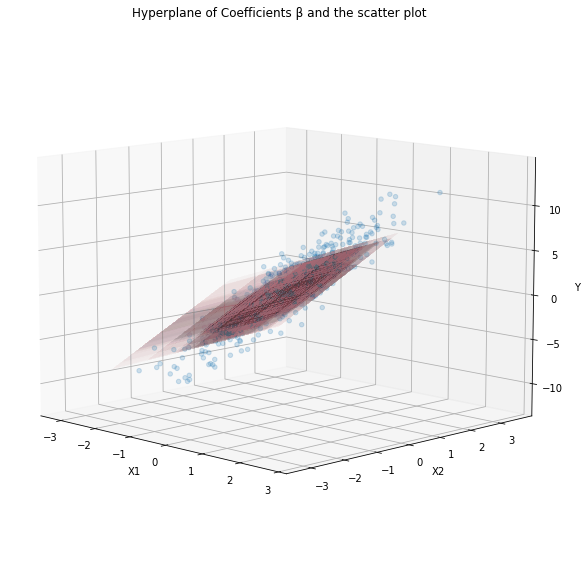

### $$\text{Real Valuse:}$$
## $$
\begin{array}{|c|c|}
\hline \beta_{0} & 1 \\
\hline \beta_{1} & 2.5 \\
\hline \beta_{2} & 2.8 \\
\hline \sigma & 1 \\
\hline size & 500 \\
\hline
\end{array}
$$


### $$Estimation:$$
## $$
\begin{array}{|c|c|}
\hline \beta_{0} & 0.8433 \\
\hline \beta_{1} & 1.8179 \\
\hline \beta_{2} & 2.1354\\
\hline \sigma & 7.1888 \\
\hline
\end{array}
$$

### $$\text{Percentage absolute relative error (PARE):}$$
## $$
\begin{array}{|c|c|}
\hline \beta_{0} & 59.8866 \text{%} \\
\hline \beta_{1} & 36.0453 \text{%} \\
\hline \beta_{2} & 42.8976 \text{%} \\
\hline
\end{array}
$$

In [271]:
np.random.seed(123)
n = 500
k = 2 

X = np.ones((n,k+1))
X[:,1:] = np.random.normal(loc=0,scale=1,size=k*n).reshape(n,k)
beta_true = np.matrix( [1,2.5,2.8]).T
sigma_true = 1
eta = np.dot(X,beta_true) + np.random.normal(loc=0, scale = sigma_true, size=(n,1))

Y =  bernoulli.rvs(p = norm.cdf(eta))
YY.mean()
interations = 10000
beta, beta_tried, acpt_rate = MH(Y=Y,X=X, interations=interations, tau=1, lambda0=1, start=0) 
print(f"The acceptance rate: {np.round(acpt_rate*100,4)}% \n")
for n in range(beta.T[0].shape[0]):
    true = float(beta_true[n])
    m = np.around(np.mean(beta[n,:]),4)
    stdev = np.around(np.std(beta[n,:]),4)
    print(f"Beta({n}) mean prediction: {m}, true_beta: {true} \n")

The acceptance rate: 45.38% 

Beta(0) mean prediction: 0.8433, true_beta: 1.0 

Beta(1) mean prediction: 1.8179, true_beta: 2.5 

Beta(2) mean prediction: 2.1354, true_beta: 2.8 



In [272]:
X0 = np.array(X[:,0].reshape(-1,1))
X1 = np.array(X[:,1].reshape(-1,1))
X2 = np.array(X[:,2].reshape(-1,1))
YY = np.array(eta)

Text(0, 0.5, 'Y')

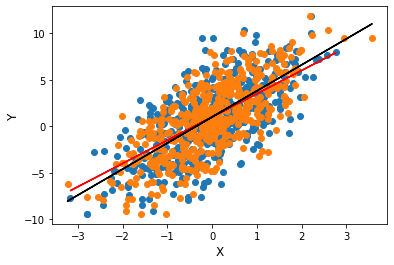

In [273]:
#plt.scatter(X0,Y)
plt.scatter(X1,YY)
plt.scatter(X2,YY)
plt.plot(X1,X0+2.5*X1,color='red')
plt.plot(X2,X0+2.8*X2,color='black')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)

In [274]:
beta0 = np.around(np.mean(beta[0,:]),4)
beta1 = np.around(np.mean(beta[1,:]),4)
beta2 = np.around(np.mean(beta[2,:]),4)


In [275]:
np.var(eta)-(beta0**2)*np.var(X0)-(beta1**2)*np.var(X1)-(beta2**2)*np.var(X2)

7.188810125992467

In [293]:
## PARE Calculations:
beta_means = (beta0+beta1+beta2)/3
PARE = abs((beta_means-beta_true)/beta_true)*100
PARE

matrix([[59.88666667],
        [36.04533333],
        [42.89761905]])


 BETA(0) 



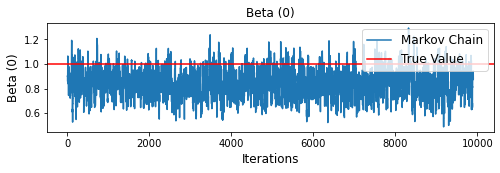


 BETA(1) 



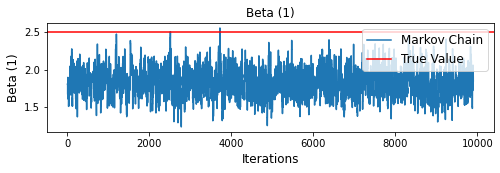


 BETA(2) 



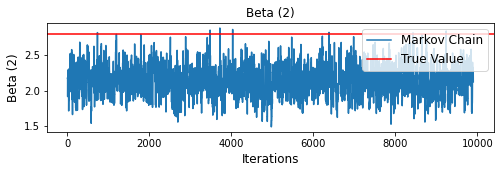

In [276]:
for n in range(beta.shape[0]):
    print(f"\n BETA({n}) \n")
    plt.figure(figsize=(8,2))
    plt.title(f'Beta ({n})')
    plt.plot(beta[n,100:].T) 
    plt.axhline(beta_true[n], color='r', linestyle='-')
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel(f'Beta ({n})', fontsize=12)
    plt.legend(['Markov Chain','True Value'], fontsize=12, loc=1)
    #plt.ylim((0,1.25))
    plt.show()


 BETA(0) 



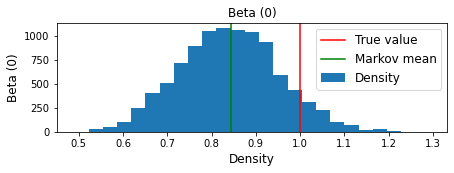


 BETA(1) 



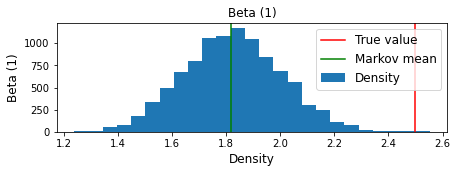


 BETA(2) 



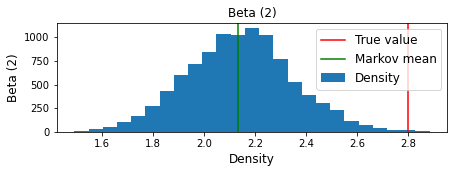

In [277]:
### Histogram
for n in range(beta.shape[0]):
    print(f"\n BETA({n}) \n")
    plt.figure(figsize=(7,2))
    plt.title(f'Beta ({n})')
    plt.hist(beta[n,100:], bins=25)
    plt.axvline(beta_true[n], color='r', linestyle='-')
    plt.axvline(np.mean(beta[n,:]), color='green', linestyle='-')
    #plt.axvline(MLE[n], color='blue', linestyle='-')
    plt.xlabel('Density', fontsize=12)
    plt.ylabel(f'Beta ({n})', fontsize=12)
    plt.legend(['True value', 'Markov mean','Density'], fontsize=12, loc=1)
    plt.show()

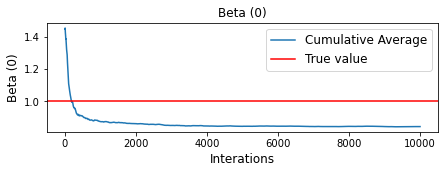

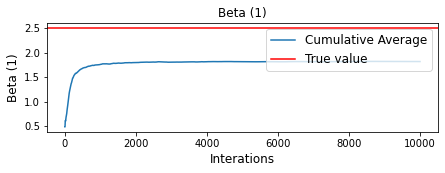

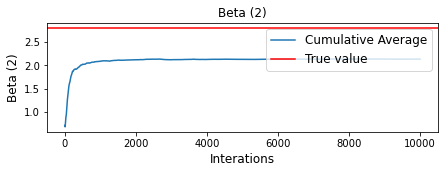

In [254]:
for n in range(beta.shape[0]):
    beta_avg_cum = np.zeros(shape=(interations,))
    for t in range (interations):
        beta_avg_cum[t] = np.sum(beta[n,:t+1])/(t+1)
    plt.figure(figsize=(7,2))
    plt.title(f'Beta ({n})')
    plt.plot(beta_avg_cum.T) 
    plt.axhline(beta_true[n], color='r', linestyle='-')
    plt.xlabel('Interations', fontsize=12)
    plt.ylabel(f'Beta ({n})', fontsize=12)
    #plt.ylim(0.25,2.5)
    plt.legend(['Cumulative Average','True value'], fontsize=12, loc=1)
    plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(123)
n = 500 # number of observations
k = 2 # k = number of betas -1

X = np.ones((n,k+1))
X[:,1:] = np.random.normal(loc=0,scale=1,size=k*n).reshape(n,k)
beta_true = np.matrix( [1,2.5,2.8]).T
sigma_true = 1
eta = np.dot(X,beta_true) + np.random.normal(loc=0, scale = sigma_true, size=(n,1))

In [4]:
X0 = np.array(X[:,0].reshape(-1,1))
X1 = np.array(X[:,1].reshape(-1,1))
X2 = np.array(X[:,2].reshape(-1,1))
YY = np.array(eta)


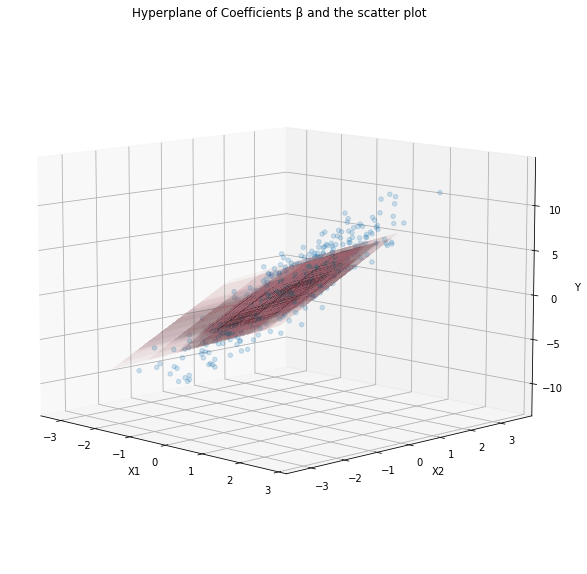

In [11]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=X1, ys=X2, zs=YY,alpha=0.2)

XX, XY = np.meshgrid(X1, X2)
eq2= 1+2.5*XX+2.8*XY
eq = 0.8433+1.8179*XX+2.1354*XY
ax.plot_surface(XX, XY, eq,alpha=0.01, color="pink")
#ax.plot_surface(XX, XY, eq2,alpha=0.01, color="black")
ax.set_ylabel('X2'); ax.set_xlabel('X1'); ax.set_zlabel('Y')
ax.view_init(10, -45)
plt.title('Hyperplane of Coefficients β and the scatter plot')
plt.show()